In [22]:
#Livrarias usadas
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from yellowbrick.cluster import KElbowVisualizer
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [23]:
df = pd.read_table("MCDONALDS.csv", sep=";", decimal = ',')
df.set_index('Lanche', inplace = True)
df[0:4]

,Valor Energetico,Carboidratos,Proteinas,Gorduras Totais,Gorduras Saturadas,Gorduras Trans,Colesterol,Fibra Alimentar,Sodio,Calcio,Ferro
Lanche,,,,,,,,,,,
Big Mac,504,41,25,27.0,12.0,0.5,54,3.5,960,162,6.5
Big Tasty,843,45,41,55.0,24.0,1.7,104,5.1,1511,381,8.2
Quarterao,558,36,31,32.0,16.0,1.3,86,3.6,1216,275,10.0
Mcnifico Bacon,625,38,34,37.0,16.0,1.3,95,3.9,1255,209,11.0


In [24]:
ss = StandardScaler()
df_scaled = pd.DataFrame(ss.fit_transform(df),columns = df.columns, index = df.index)
df_scaled = df_scaled.rename_axis(None, axis=0)
df_scaled[0:4]

,Valor Energetico,Carboidratos,Proteinas,Gorduras Totais,Gorduras Saturadas,Gorduras Trans,Colesterol,Fibra Alimentar,Sodio,Calcio,Ferro
Big Mac,0.061012,-0.039432,-0.226198,0.231040,0.495453,-0.181818,-0.207390,-0.149545,-0.547261,0.135014,0.772999
Big Tasty,2.080827,0.398701,1.187539,2.512109,2.384093,2.090909,1.232820,0.785111,1.001007,2.862701,1.368044
Quarterao,0.382752,-0.587098,0.303953,0.638373,1.125000,1.333333,0.714345,-0.091129,0.172080,1.542451,1.998092
Mcnifico Bacon,0.781949,-0.368032,0.569029,1.045707,1.125000,1.333333,0.973582,0.084119,0.281667,0.720408,2.348119


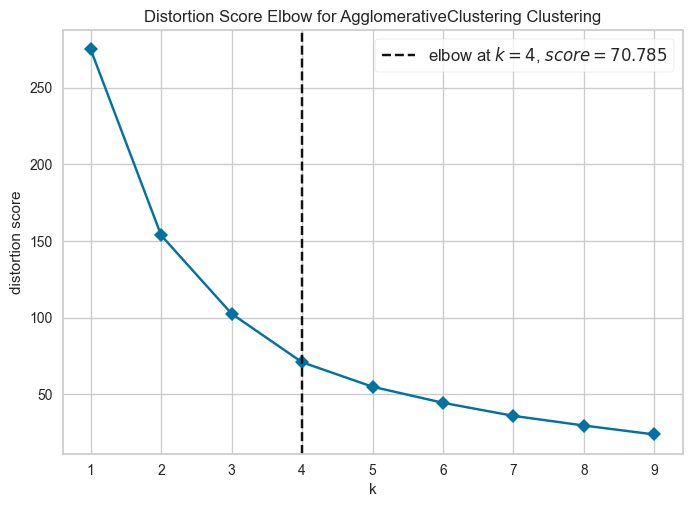

<Axes: title={'center': 'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [57]:
model = AgglomerativeClustering(linkage='ward')
visualizer = KElbowVisualizer(model, k=(1, 10), timings=False)
visualizer.fit(df_scaled)
visualizer.show()


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to '

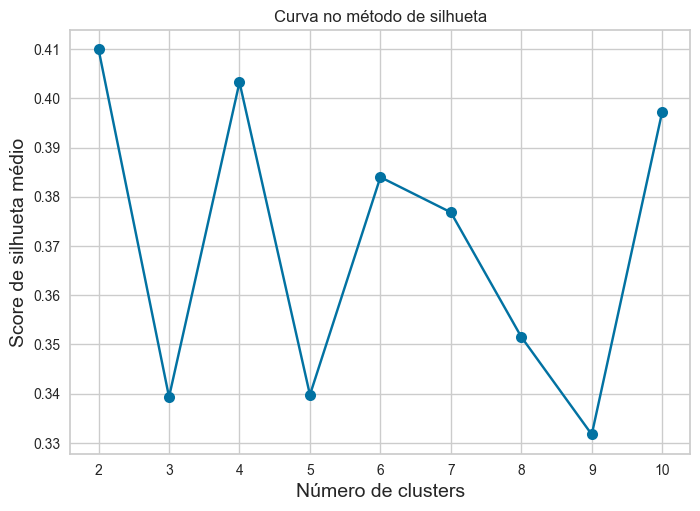

In [58]:
# Range de valores para o número de clusters
k_range = range(2, 11)

# Lista para armazenar os scores de silhueta para cada valor de k
sil_scores = []

# Loop sobre o range de valores de k
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=123)
    kmeans.fit(df_scaled)
    labels = kmeans.labels_
    sil_score = silhouette_score(df_scaled, labels)
    sil_scores.append(sil_score)

# Plot da curva de cotovelo com base nos scores de silhueta
plt.plot(k_range, sil_scores, 'bo-', markersize=8)
plt.xlabel('Número de clusters', fontsize=14)
plt.ylabel('Score de silhueta médio', fontsize=14)
plt.title('Curva no método de silhueta')
plt.show()


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


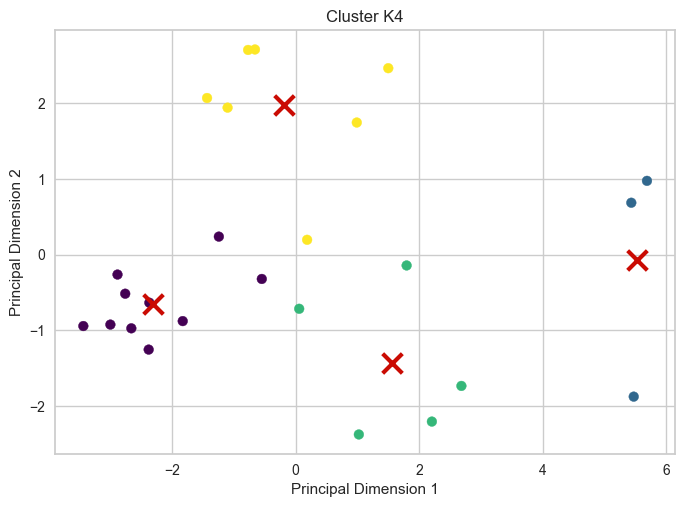

Big Mac: Cluster 2
Big Tasty: Cluster 1
Quarterao: Cluster 2
Mcnifico Bacon: Cluster 2
Cheddar McMelt: Cluster 2
McFish: Cluster 0
McChicken: Cluster 0
McChicken Jr: Cluster 0
Chicken Classic Crispy: Cluster 3
Chicken Classic Grill: Cluster 3
Chicken Club Crispy: Cluster 3
Chicken Club Grill: Cluster 3
Chicken Lemon Crispy: Cluster 3
Chicken Lemon Grill: Cluster 3
Cheeseburger: Cluster 0
Hamburger: Cluster 0
Wrap Grill Maionese: Cluster 0
Wrap Crispy Maionese: Cluster 0
Wrap Grill Lemon: Cluster 0
Wrap Crispy Lemon: Cluster 0
Chicken Bacon Crispy: Cluster 3
Chicken Bacon Grill: Cluster 0
Angus Bacon: Cluster 1
Angus Deluxe: Cluster 1
CBO : Cluster 2


In [47]:
# Executa PCA da base padronizada
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)


# Perform clustering on the PCA-transformed data
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(df_pca)

# Plot the clusters on the two principal dimensions
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', s=200, linewidths=3, color='r', zorder=10)
plt.title('Cluster K{}'.format(n_clusters))
plt.xlabel('Principal Dimension 1')
plt.ylabel('Principal Dimension 2')
plt.show()

# Print the cluster labels for each item
for item, label in zip(df.index, kmeans.labels_):
    print('{}: Cluster {}'.format(item, label))



In [56]:
labels = kmeans.labels_
df['cluster'] = labels
df.insert(0, 'Lanches', df.index)
df.to_csv('non-hierarchical_k-means.csv', index=False, sep=';', decimal=',')
df[1:4]

,Lanches,Index,Valor Energetico,Carboidratos,Proteinas,Gorduras Totais,Gorduras Saturadas,Gorduras Trans,Colesterol,Fibra Alimentar,Sodio,Calcio,Ferro,cluster
Lanche,,,,,,,,,,,,,,
Big Tasty,Big Tasty,Big Tasty,843,45,41,55.0,24.0,1.7,104,5.1,1511,381,8.2,1
Quarterao,Quarterao,Quarterao,558,36,31,32.0,16.0,1.3,86,3.6,1216,275,10.0,2
Mcnifico Bacon,Mcnifico Bacon,Mcnifico Bacon,625,38,34,37.0,16.0,1.3,95,3.9,1255,209,11.0,2
